In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

print(tf.__version__)

2.3.0


In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()

In [7]:
type(data)

sklearn.utils.Bunch

In [8]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
data.data.shape

(569, 30)

In [10]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
data.target.shape

(569,)

In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D =X_train.shape

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = Sequential([
        Input(shape=(D,)),
        Dense(1, activation='sigmoid')
])


model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 1.2751 - accuracy: 0.2493 - val_loss: 1.2589 - val_accuracy: 0.1968
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1648 - accuracy: 0.2808 - val_loss: 1.1499 - val_accuracy: 0.2287
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0630 - accuracy: 0.3255 - val_loss: 1.0490 - val_accuracy: 0.2766
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9700 - accuracy: 0.3963 - val_loss: 0.9575 - val_accuracy: 0.3511
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8853 - accuracy: 0.4357 - val_loss: 0.8755 - val_accuracy: 0.4096
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8098 - accuracy: 0.5092 - val_loss: 0.8031 - val_accuracy: 0.4415
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7436 - accuracy: 0.5407 - val_loss: 0.7392 - val_accuracy: 0.5213
Epoch 8/100


In [29]:
print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.9764
Train Score: [0.10958565771579742, 0.9763779640197754]
6/6 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9574
Test Score: [0.116921067237854, 0.957446813583374]


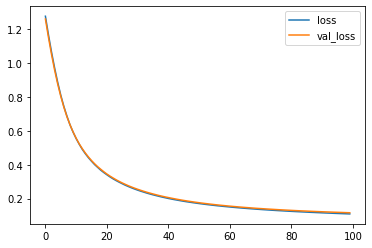

In [30]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

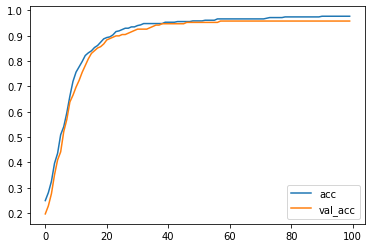

In [31]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()